# Module Title:	 Machine Learning for Business  
### Assessment Title:  MLBus_HDipData_CA1
### Lecturer Name:	 Dr. Muhammad Iqba  
### Student Full Name & Number:	Natalia de Oliveira Rodrigues 2023112 and Heitor Gomes de Araujo Filho 2023098

This CA will assess student attainment of the following minimum intended learning outcomes:

1. Critically evaluate and implement appropriate clustering algorithms and interpret and document 
their results. (Linked to PLO 1, PLO 5)
2. Apply modelling to time series data to facilitate business intelligence needs (Linked to PLO 1, PLO 2, 
PLO 3

**Project Objective:** 
Perform time series analysis on the historical plane crash data and use clustering techniques to identify patterns and clusters of crash incidents over time. 

1. **Temporal Patterns Analysis:** How the frequency of plane crashes has evolved over the years. Are there any long-term trends or seasonal patterns in crash occurrences?

2. **Clustering of Crash Incidents:** Identify commonalities among different incidents using clustering algorithms to group similar plane crashes based on characteristics such as crash causes, flight phases, and other relevant factors. 

3. **Visualization of Clustered Data:** How certain types of crashes have become more or less prevalent over the years?(identified clusters over time)

4. **Anomaly Detection:** These could be extreme or unusual crash incidents that deviate from the typical patterns.

5. **Forecasting:** Predict the future trend of plane crashes based on historical data using time series forecasting models. (valuable tool for aviation safety assessment)

6. **Interpreting Cluster Characteristics:**  Are there specific conditions or causes that lead to certain types of accidents? Investigate the characteristics and factors that contribute for each cluster of crashes formation.

7. **Evaluation of Clustering Methods:** Compare and evaluate different clustering algorithms to determine which one provides the most meaningful insights into the dataset.

**Aims:** 
- Deeper understanding of the historical plane crash data, 
- Identify recurring patterns, 
- Potentially discover factors that contribute to certain types of accidents. 

# Exploratory Data Analysis

In [2]:
# Most commun libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
 
# Libraries for Preprocessing encoding
from sklearn.preprocessing import LabelEncoder

# Libraries for Preprocessing scaling
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

# Libraries for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from tbats import TBATS
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa # can access various time series analysis functions, classes, and models for tasks such as time series forecasting, seasonality analysis, and autocorrelation analysis

# Libraries for model validation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset from Plane Crashes.csv and display head(2)
df = pd.read_csv('../../data/Plane Crashes.csv')
df.head(2)

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure


In [4]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Sort the dataset by the 'Date' column
df = df.sort_values(by='Date')

In [6]:
# Set the 'Date' column to index
df.index = df['Date']

# Drop the 'Date' column from the dataframe
df.drop('Date', axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28536 entries, 1918-05-02 to 2022-06-03
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              13949 non-null  object 
 1   Aircraft          28535 non-null  object 
 2   Operator          28536 non-null  object 
 3   Registration      27721 non-null  object 
 4   Flight phase      27898 non-null  object 
 5   Flight type       28479 non-null  object 
 6   Survivors         27239 non-null  object 
 7   Crash site        28153 non-null  object 
 8   Schedule          19590 non-null  object 
 9   MSN               24354 non-null  object 
 10  YOM               23225 non-null  float64
 11  Flight no.        0 non-null      float64
 12  Crash location    28524 non-null  object 
 13  Country           28535 non-null  object 
 14  Region            28535 non-null  object 
 15  Crew on board     28512 non-null  float64
 16  Crew fatalities   28535

# Data Preprocessing 
Data preprocessing primarily focuses on cleaning, transforming, and preparing raw data for immediate analysis or modeling. Data preprocessing involves tasks such as handling missing data, dealing with outliers, scaling features, encoding categorical variables, and ensuring data is ready for analysis or model training. 


### Data Preprocessing: Investigating numerical variables

In [8]:
columns_to_convert = ['YOM', 'Crew on board', 'Crew fatalities', 'Pax on board', 'PAX fatalities', 
                      'Other fatalities', 'Total fatalities']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')

In [9]:
# Invalid values column Year of manufacture
df.YOM.unique()

<IntegerArray>
[<NA>, 1918, 1919, 1920, 1921, 1923, 1922, 1924, 1925,    1,
 ...
 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2020, 2019]
Length: 145, dtype: Int64

In [10]:
# To create a filter valid_year where only values after 1900 and before 2022 will be kept
valid_years = (df['YOM'] >= 1900) & (df['YOM'] <= 2022)
df = df[valid_years]

### Data Preprocessing: Investigating categorical variables

In [11]:
df.describe(include = 'object').T

,count,unique,top,freq
Time,12271,1380,12H 0M 0S,344
Aircraft,22873,966,Douglas C-47 Skytrain (DC-3),1955
Operator,22874,8594,United States Air Force - USAF,1307
Registration,22827,22580,1,5
Flight phase,22392,5,Landing (descent or approach),8710
Flight type,22824,31,Scheduled Revenue Flight,5545
Survivors,22008,2,Yes,12836
Crash site,22589,6,Airport (less than 10 km from airport),11518
Schedule,16227,13900,Point Cook - Point Cook,22
MSN,22763,17572,01,46


In [12]:
# This investigate unique values of Region attribute
df.Region.unique()

array(['Europe', 'North America', 'Africa', 'World', 'Oceania', 'Asia',
       'South America', 'Central America', 'Antarctica'], dtype=object)

In [13]:
# This investigate how many observations where Region is World
df_region_check = df[df['Region'] == 'World']
print(f'There are {df_region_check.shape[0]} observations where Region is classified as World.')

There are 398 observations where Region is classified as World.


**Region:**
- World is a way to classify aviation incidents that do not belong to a specific continent or region. For example when it happen in internatinal airspace, or over oceans, or in locations that do not fall within the boundaries of a specific continent. 

- America continent is split in North America, South America and Central America to provide more detailed information regarding the region of the aviation incidents. 


In [14]:
# This investigate unique values of Crash cause attribute
df['Crash cause'].unique()

array(['Technical failure', 'Unknown', 'Weather', 'Human factor',
       'Other causes', 'Terrorism act, Hijacking, Sabotage'], dtype=object)

In [15]:
# This investigate how many observations where Crash cause is Unknown
df_cause_check = df[df['Crash cause'] == 'Unknown']
print(f'There are {df_cause_check.shape[0]} observations where Crash cause is classified as Unknown.')

There are 6569 observations where Crash cause is classified as Unknown.


In [16]:
df['Flight type'].value_counts()

Flight type
Scheduled Revenue Flight                       5545
Military                                       3104
Cargo                                          2591
Private                                        2179
Training                                       1793
Charter/Taxi (Non Scheduled Revenue Flight)    1737
Executive/Corporate/Business                   1007
Positioning                                     639
Survey / Patrol / Reconnaissance                465
Test                                            462
Spraying (Agricultural)                         457
Ferry                                           384
Postal (mail)                                   362
Supply                                          305
Government                                      211
Ambulance                                       209
Bombing                                         195
Illegal (smuggling)                             193
Delivery                                        166


**Flight type:**
- Private: Private flights are those operated by individuals or organizations for non-commercial, personal, or business purposes.
- Scheduled Revenue Flight: These are the typical passenger or cargo flights you find in commercial aviation. Passengers purchase tickets or cargo space, and the flights follow a set timetable.
- Charter/Taxi (Non Scheduled Revenue Flight): Charter or non-scheduled revenue flights are flights that are not part of regular airline schedules. They are typically arranged on a case-by-case basis for specific customers or purposes.
- Survey / Patrol / Reconnaissance: they are operated for purposes like aerial photography, monitoring, or data collection.


### Data Preprocessing: Encoding categorical variables
- Nominal variables = one-hot encoded (Aircraft, Operator, Flight type, Crash site, Schedule, Chash location, Country, Crash cause, Circumstances
- Ordinal variables = label encoded (if the order is meaningful: Survivors and Flight phase).

In [17]:
df['Survivors'].unique()

array(['Yes', 'No', nan], dtype=object)

In [18]:
# Create a LabelEncoder object for Survivors attribute
label_encoder = LabelEncoder()

# Apply label encoding to the "Survivors" column
df['Survivors_encoded'] = label_encoder.fit_transform(df['Survivors'])

It appears that these flight phases have a logical order based on the unique variables you gave, therefore utilizing LabelEncoder is a fair strategy.

In [19]:
# Create a LabelEncoder object for Flight phase attribute  
df['Flight phase'].unique()

array(['Takeoff (climb)', 'Landing (descent or approach)', 'Flight', nan,
       'Taxiing', 'Parking'], dtype=object)

In [20]:
# Define a custom mapping of 'Flight phase' to numerical values
custom_mapping = {
    'Parking': 0,
    'Taxiing': 1,
    'Takeoff (climb)': 2,
    'Landing (descent or approach)': 3,
    'Flight': 4
}

# Map the 'Flight phase' column to the custom numerical values
df['Flight phase_encoded'] = df['Flight phase'].map(custom_mapping).astype('Int64')

### Data Preprocessing: Handling missing data

In [21]:
# Remove the attributes with high missing data values, and attributes without variance(unique identifiers) 
df = df.drop(columns=["Flight no.", "Time", 'MSN','Registration','Schedule'])

In [22]:
# Display the remain missing values, and dataset shape
print(f'The new dataset shape: {df.shape}')
df.isnull().sum().sort_values(ascending=False)

The new dataset shape: (22874, 20)


Survivors               866
Flight phase_encoded    482
Flight phase            482
Crash site              285
Flight type              50
Pax on board             29
Circumstances             9
Other fatalities          7
Crew on board             7
Crash location            5
Crew fatalities           1
Aircraft                  1
Region                    0
Operator                  0
Country                   0
PAX fatalities            0
Total fatalities          0
YOM                       0
Crash cause               0
Survivors_encoded         0
dtype: int64

In [23]:
# Select the last 50 years
df = df.loc['1972-01-01':'2022-05-31']

In [24]:
# Remove all rows with any missing values 
df.dropna(inplace=True) 

In [25]:
# Double check if missing values were removed sucessfully
print(f'The new dataset shape: {df.shape}')
df.isnull().sum()

The new dataset shape: (11686, 20)


Aircraft                0
Operator                0
Flight phase            0
Flight type             0
Survivors               0
Crash site              0
YOM                     0
Crash location          0
Country                 0
Region                  0
Crew on board           0
Crew fatalities         0
Pax on board            0
PAX fatalities          0
Other fatalities        0
Total fatalities        0
Circumstances           0
Crash cause             0
Survivors_encoded       0
Flight phase_encoded    0
dtype: int64

# Data Visualization

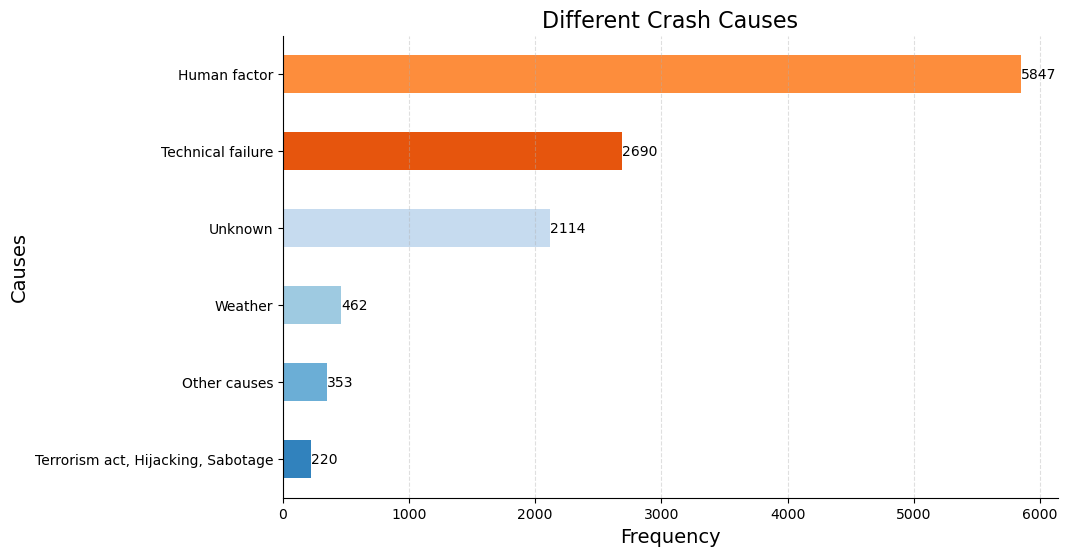

In [26]:
# Plot Different Crash Causes
viz_crash_causes = df['Crash cause'].value_counts()

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c(range(len(viz_crash_causes)))  

viz_crash_causes.sort_values().plot(kind='barh', color=colors)
plt.title('Different Crash Causes', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Causes', fontsize=14) 

for index, value in enumerate(viz_crash_causes.sort_values()):
    plt.text(value, index, str(value), ha='left', va='center')

sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

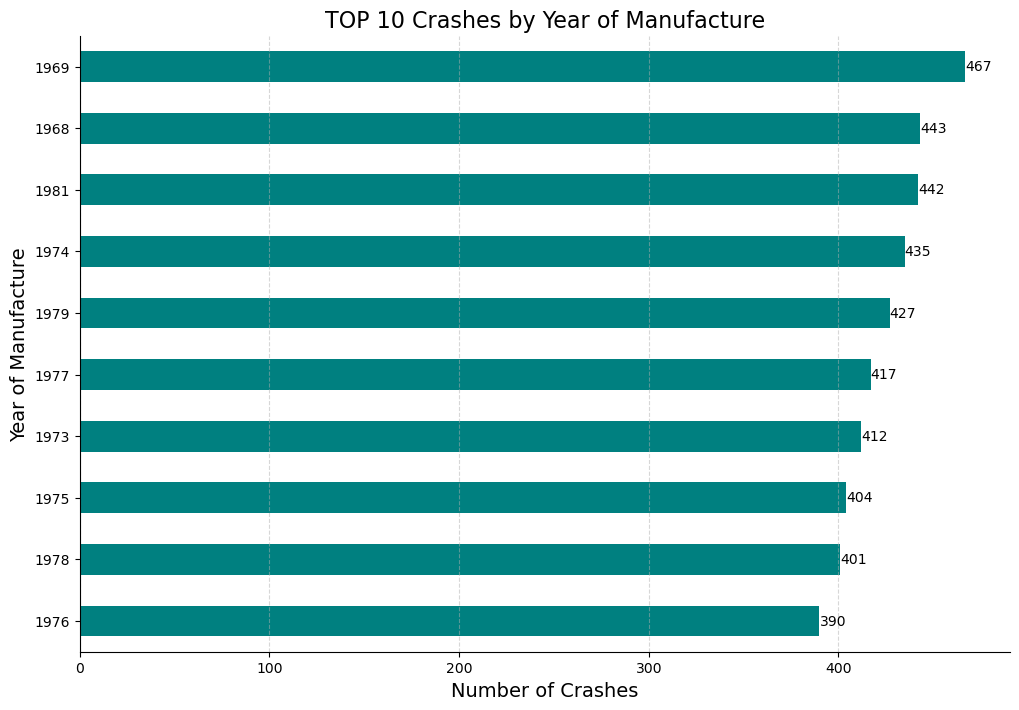

In [27]:
# YOM Vs Crashes causes viz
top_crash_years = df['YOM'].value_counts().head(10).sort_values()

plt.figure(figsize=(12, 8))
top_crash_years.plot(kind='barh', color='teal')
plt.title('TOP 10 Crashes by Year of Manufacture', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Year of Manufacture', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability

for index, value in enumerate(top_crash_years):
    plt.text(value, index, str(value), ha='left', va='center')
    
sns.despine()
plt.show()

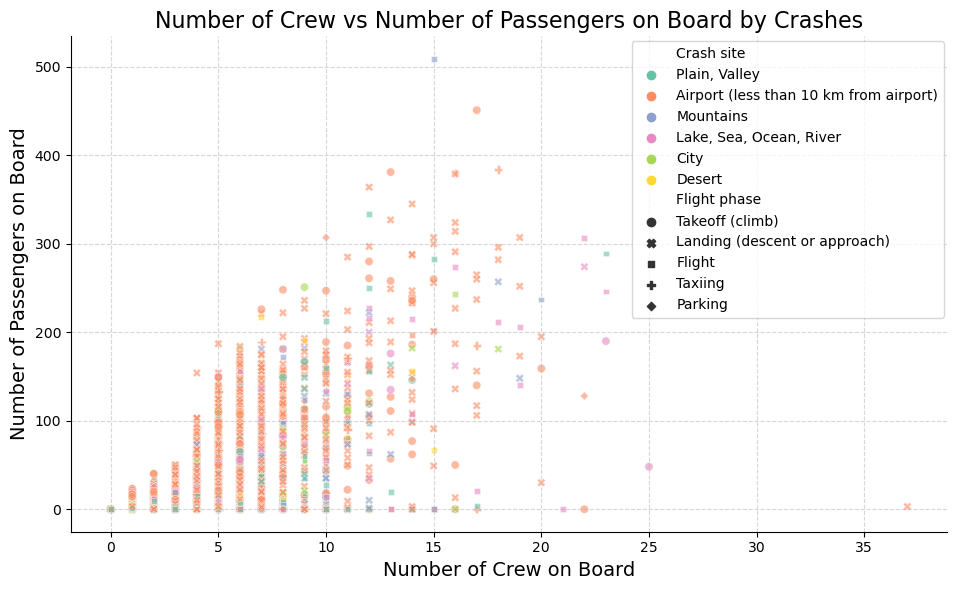

In [28]:
# Plot Number of Crew vs Number of Passengers on Board by Crashes
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Crew on board', y='Pax on board', hue='Crash site', 
                style='Flight phase', palette='Set2',alpha=0.6)

plt.title('Number of Crew vs Number of Passengers on Board by Crashes', fontsize=16)
plt.xlabel('Number of Crew on Board', fontsize=14)
plt.ylabel('Number of Passengers on Board', fontsize=14)

sns.despine()
plt.legend(bbox_to_anchor=(0.64, 0.99), loc='upper left', borderaxespad=0.0)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()  
plt.show()


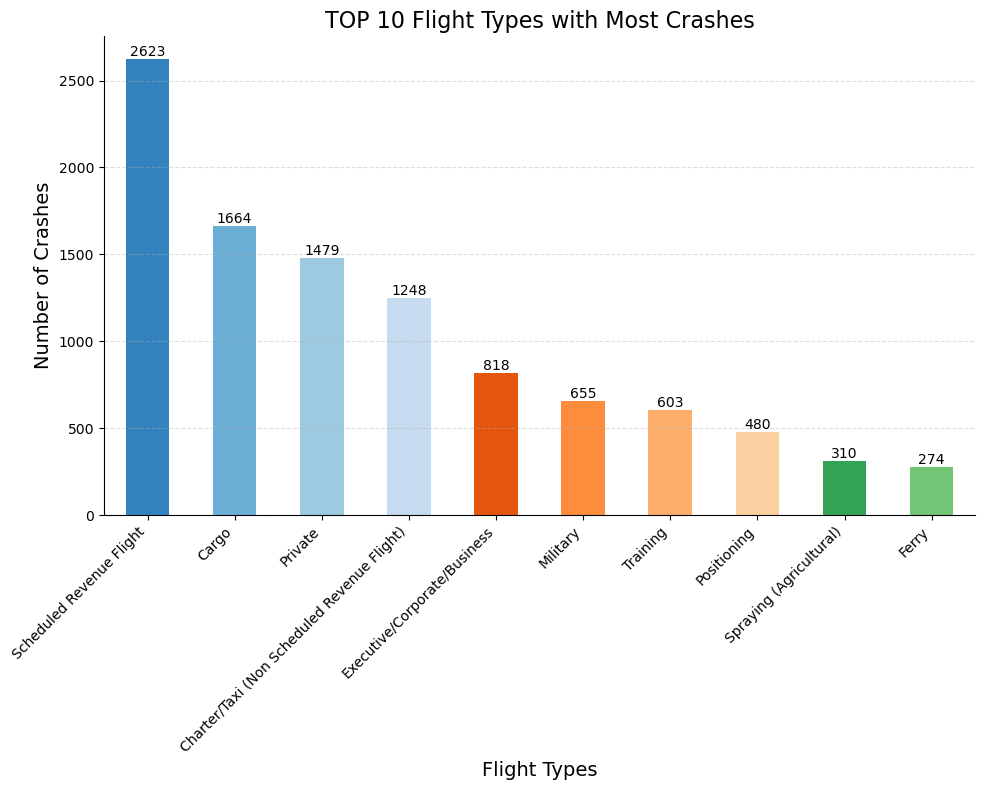

In [29]:
# Plot Top 10 Flight Types with Most Crashes
top_flight_types = df['Flight type'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
colors = plt.cm.tab20c(range(len(top_flight_types)))  # Color variation for bars

top_flight_types.plot(kind='bar', color=colors)
plt.title('TOP 10 Flight Types with Most Crashes', fontsize=16)
plt.xlabel('Flight Types', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)

for index, value in enumerate(top_flight_types):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(range(len(top_flight_types)), top_flight_types.index, rotation=45, ha='right', fontsize=10)  # Adjust label size and rotation
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


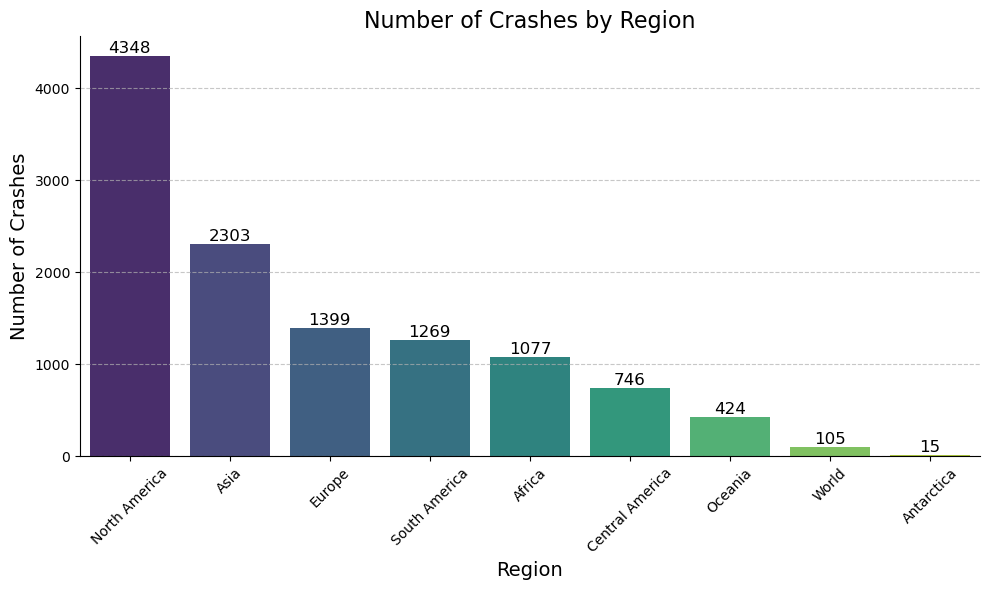

In [30]:
# Plot Number of Crashes by Region
crashes_by_region = df['Region'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=crashes_by_region.index, y=crashes_by_region, palette='viridis')
plt.title('Number of Crashes by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(crashes_by_region):
    bar_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

sns.despine()
plt.tight_layout()  
plt.show()


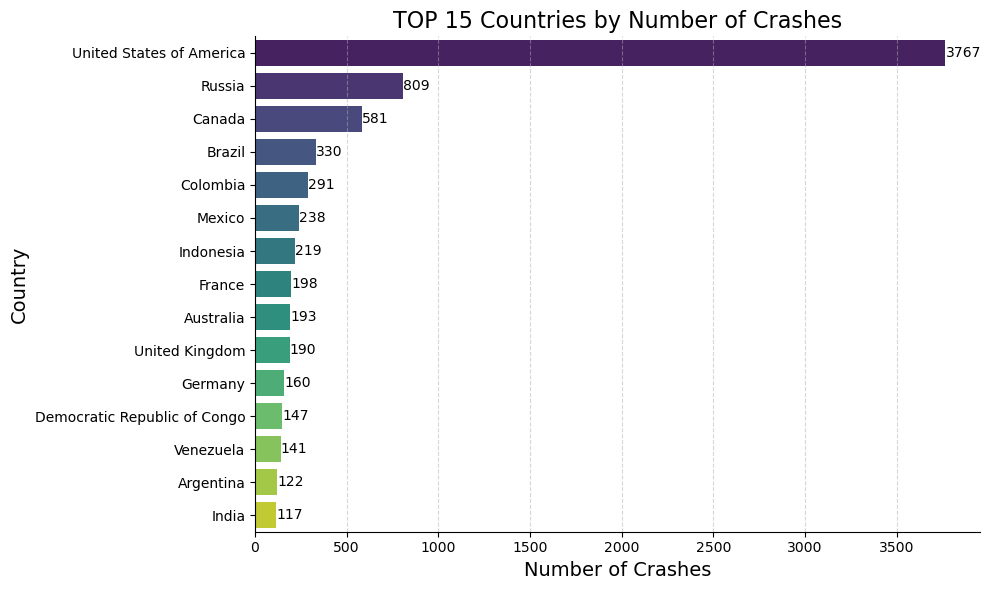

In [31]:
# Plot the top 15 countries by number of crashes 
top_countries = df['Country'].value_counts().head(15).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_countries, y=top_countries.index, palette='viridis', orient='h')
plt.title('TOP 15 Countries by Number of Crashes', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  

for index, value in enumerate(top_countries):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()  
sns.despine()  
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for reference

plt.show()


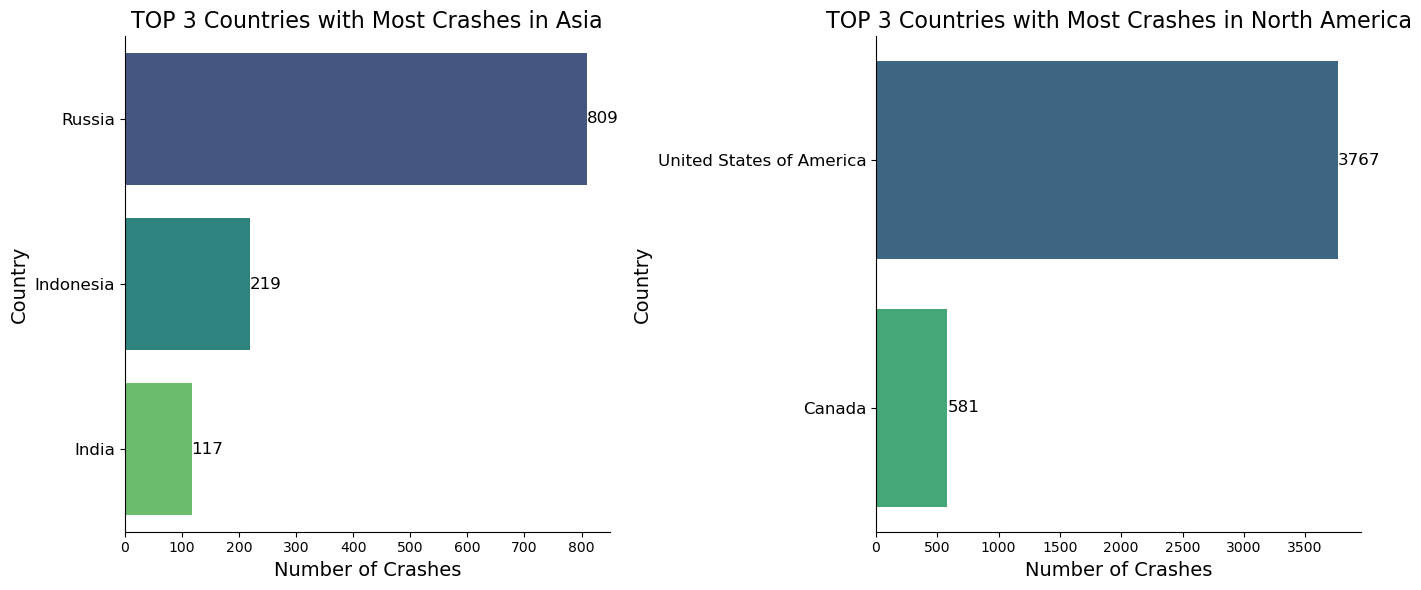

In [32]:
# Plot top 3 countries with the most crashes in the filtered regions
selected_regions = ['North America', 'Asia']
filtered_df = df[df['Region'].isin(selected_regions)]

top_countries_by_region = filtered_df.groupby('Region')['Country'].value_counts().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

plt.figure(figsize=(14, 6))

for region in top_countries_by_region.index.get_level_values(0).unique():
    top_countries = top_countries_by_region.xs(region)

    plt.subplot(1, 2, list(top_countries_by_region.index.get_level_values(0).unique()).index(region) + 1)
    bar_plot = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
    plt.title(f'TOP 3 Countries with Most Crashes in {region}', fontsize=16)
    plt.xlabel('Number of Crashes', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)

    for index, value in enumerate(top_countries.values):
        bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

sns.despine()
plt.tight_layout()
plt.show()

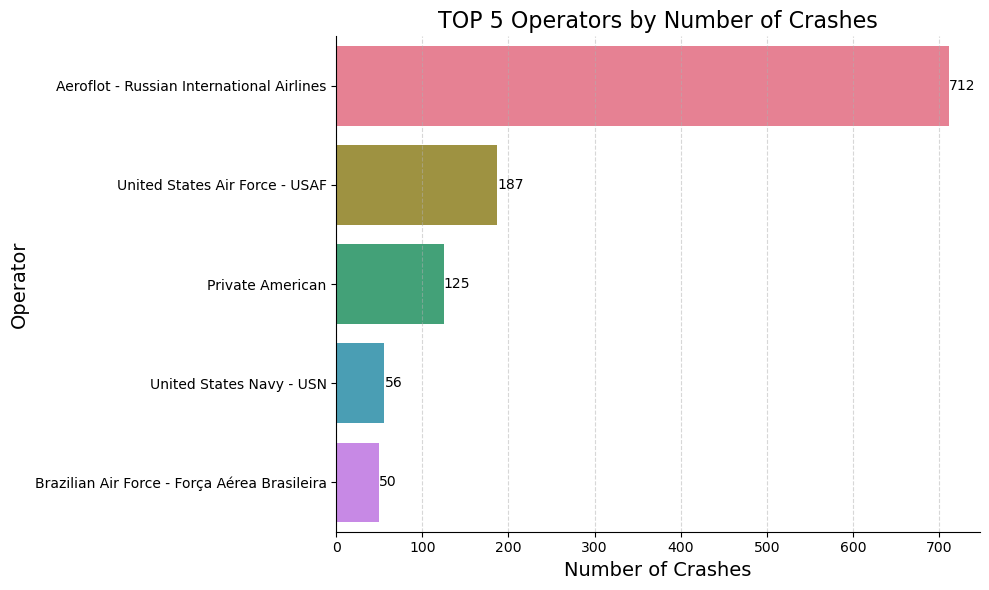

In [33]:
# Plot top 5 operators by number of crashes across all countries
top_operators = df['Operator'].value_counts().head(5).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_operators, y=top_operators.index, palette='husl', orient='h')  # Changed palette to 'coolwarm'
plt.title('TOP 5 Operators by Number of Crashes', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Operator', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for index, value in enumerate(top_operators):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

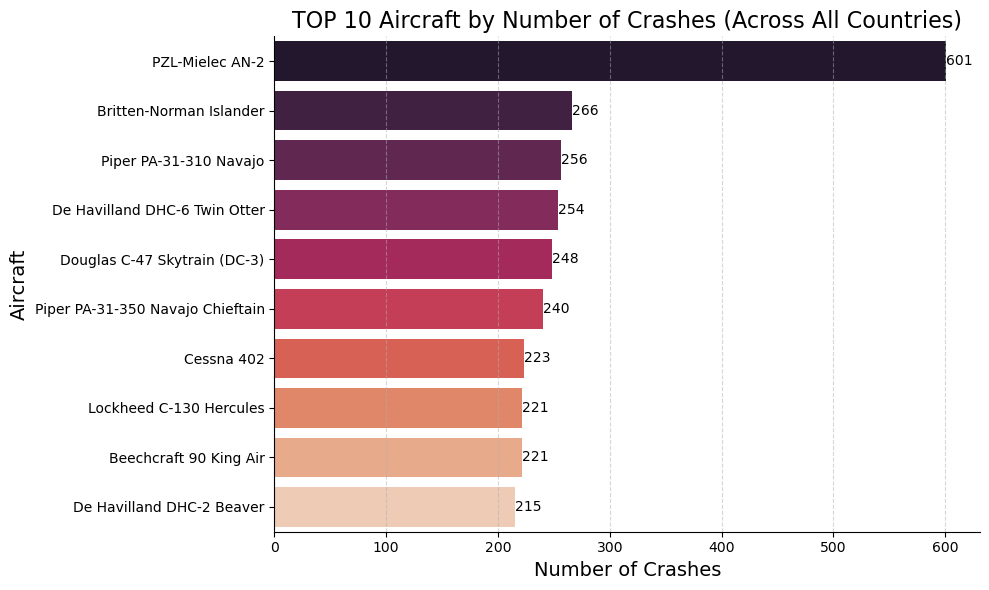

In [34]:
# Plot the top 10 aircraft with the most crashes
top_aircraft = df['Aircraft'].value_counts().head(10).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_aircraft, y=top_aircraft.index, palette='rocket', orient='h')  
plt.title('TOP 10 Aircraft by Number of Crashes (Across All Countries)', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Aircraft', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for index, value in enumerate(top_aircraft):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)  

plt.show()


# Time Series Analysis

## Temporal Patterns Analysis: How the frequency of plane crashes has evolved over the past 50 years. Are there any long-term trends or seasonal patterns in crash occurrences?

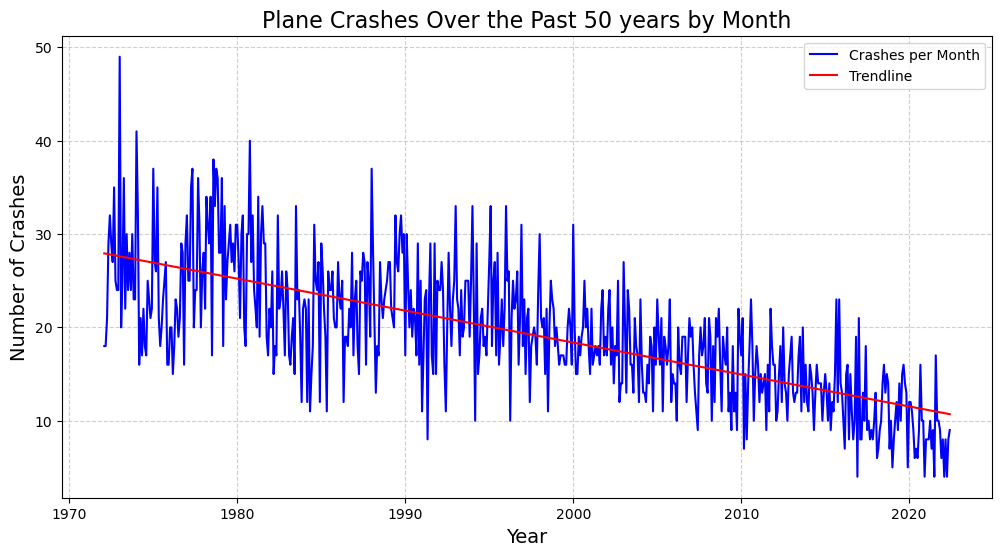

In [113]:
# Group data by month and count the number of crashes in each month
ts_df = df.resample('M').size()

# Create a time series plot
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(x=ts_df.index, y=ts_df.values, label='Crashes per Month', color='b')

# Add a trendline (linear regression)
from sklearn.linear_model import LinearRegression
X = np.arange(len(ts_df)).reshape(-1, 1)
y = ts_df.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)
plt.plot(ts_df.index, trendline, linestyle='-', label='Trendline', color='r')

plt.title('Plane Crashes Over the Past 50 years by Month',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Crashes',fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Provide a clear legend
plt.legend()

plt.show()

> Visualizing the last 50 year of the data, it is possible to see that data has a negative trend. 

## Decomposing the Time Series
Now we decompose the Time Series and will look for Levels, Trends and Seasonality in the data.

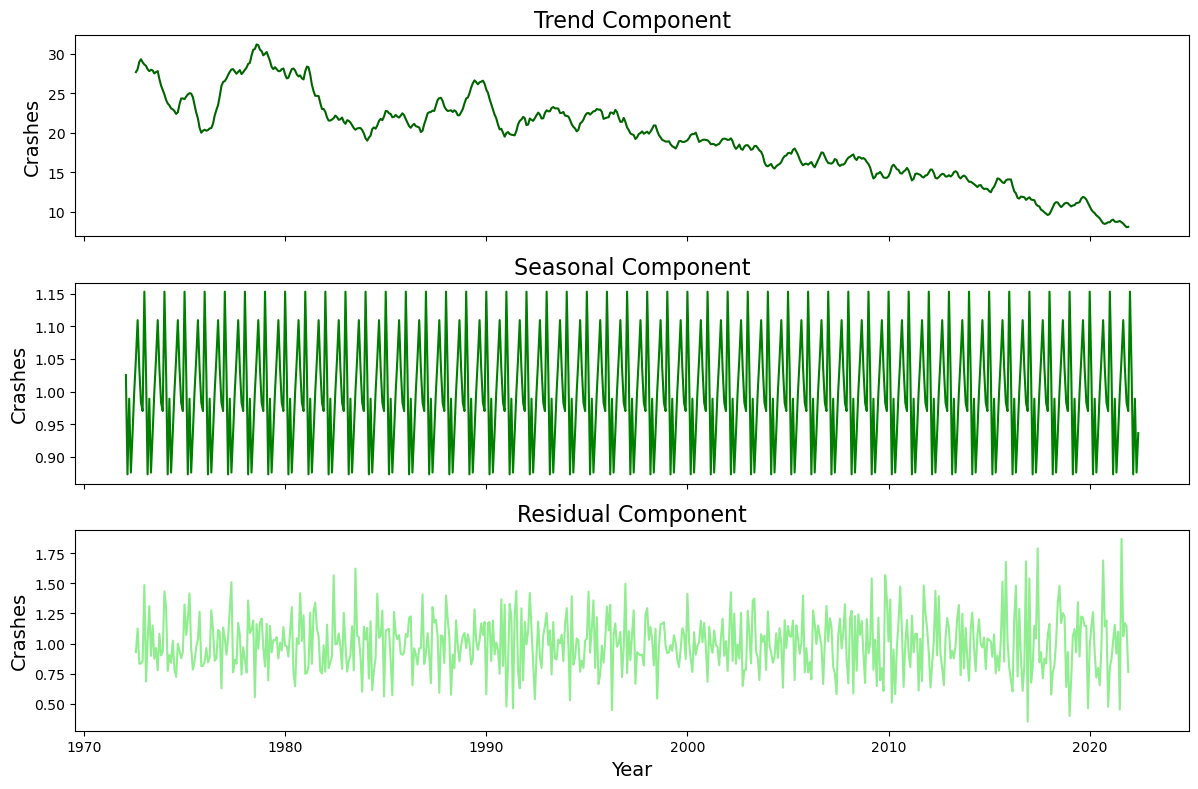

In [114]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_df, model='multiplicative') #additive 

# Create a 3x1 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot the trend component
axes[0].plot(decomposition.trend, color='darkgreen')
axes[0].set_title('Trend Component',fontsize=16)
axes[0].set_ylabel('Crashes',fontsize=14)

# Plot the seasonal component
axes[1].plot(decomposition.seasonal, color='g')
axes[1].set_title('Seasonal Component',fontsize=16)
axes[1].set_ylabel('Crashes',fontsize=14)

# Plot the residual component
axes[2].plot(decomposition.resid, color='lightgreen')
axes[2].set_title('Residual Component',fontsize=16)
axes[2].set_ylabel('Crashes',fontsize=14)

# Customize axis labels
axes[2].set_xlabel('Year',fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


> Visualizing the decomposing of the time series, it is possible to see that data has a negative trend and seasonal pattern.

## Dicky Fuller Test

In [115]:
# Check shape of data after resampling using monthly frequency
ts_df.shape

(605,)

In [116]:
# Convert array to dataframe using pandas
ts_df = pd.DataFrame(ts_df)
ts_df.shape

(605, 1)

In [117]:
# Set up index and column names
ts_df.index.name='date'
ts_df.columns=['crashes']

In [118]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(ts_df['crashes'])

# Display the results
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.229962680014189
p-value: 0.6605755765307946


> Dicky fuller test result show p-value > 0.05. It means, that the data is non stationaty. 

## Differencing

In [119]:
# First-order difference (period=1)
diff = ts_df['crashes'].diff()
ts_df_diff = pd.DataFrame(diff)
ts_df_diff = ts_df_diff.dropna()

In [120]:
# Augmented Dickey-Fuller test after differencing time series
ADF_result_first_order_diff = adfuller((diff.dropna()), autolag='AIC')
print("ADF Statistic and p-value for the original series:")
print("ADF Statistic:", ADF_result[0])
print("p-value:", ADF_result[1])

print("\nADF Statistic and p-value for the first-order differenced series:")
print("ADF Statistic:", ADF_result_first_order_diff[0])
print("p-value:", ADF_result_first_order_diff[1])

ADF Statistic and p-value for the original series:
ADF Statistic: -1.229962680014189
p-value: 0.6605755765307946

ADF Statistic and p-value for the first-order differenced series:
ADF Statistic: -13.360240181911953
p-value: 5.446188509410625e-25


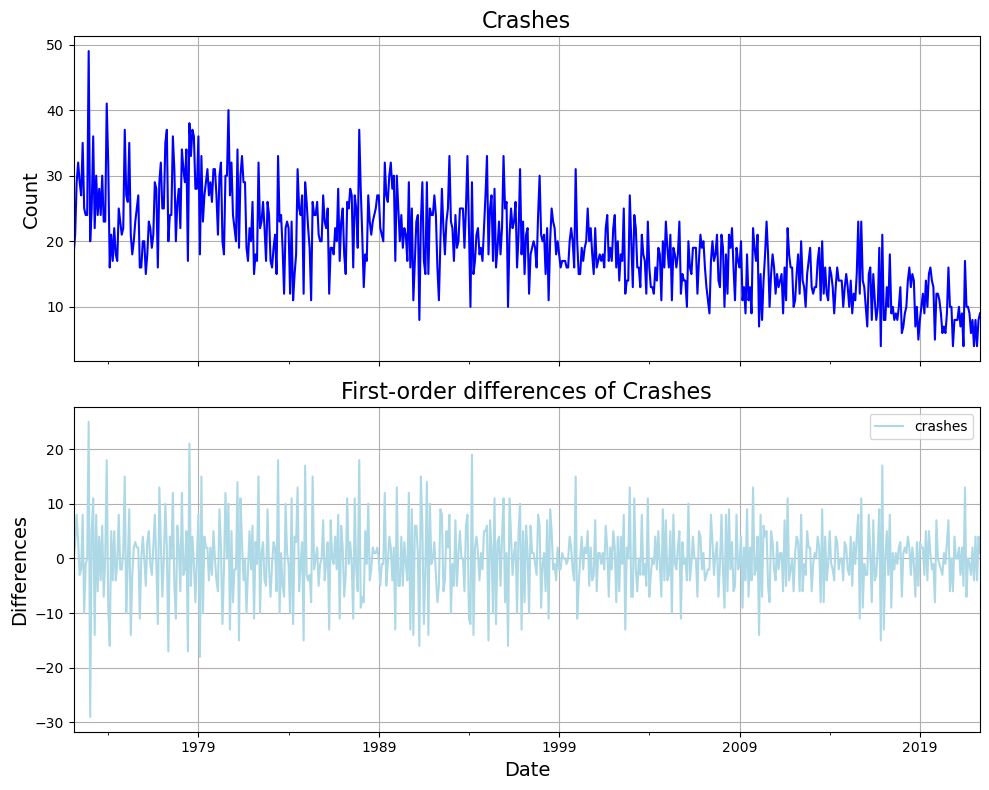

In [121]:
# Plot before and after differencing time series
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot crashes
ts_df['crashes'].plot(ax=axes[0], color='b')
axes[0].set_title('Crashes',fontsize=16)
axes[0].set_ylabel('Count',fontsize=14)  # Set the label for the y-axis of the first plot
axes[0].grid(True)  # Add a grid for better readability

# Plot first-order differences of crashes
ts_df_diff.plot(ax=axes[1], color='lightblue')
axes[1].set_title('First-order differences of Crashes',fontsize=16)
axes[1].set_ylabel('Differences',fontsize=14)  # Set the label for the y-axis of the second plot
axes[1].grid(True)  # Add a grid for better readability

# Set a common label for the x-axis
plt.xlabel('Date',fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

> Differenced Series Result: We can reject the null hypothesis! It means,  that after differecing time series using the first order. It's possible to see that the data is stationaty. The new p-value is below 0.05. 

## Autocorrelation ACF and PACF 

> ACF and PACF Plots: 
We can use the statsmodels library to build auto-correlation (ACF) and partial auto-correlation plots from the differenced series. ACF describes how well the present value of the series is related with its past values while PACF finds correlation of the residuals with the next lag value.

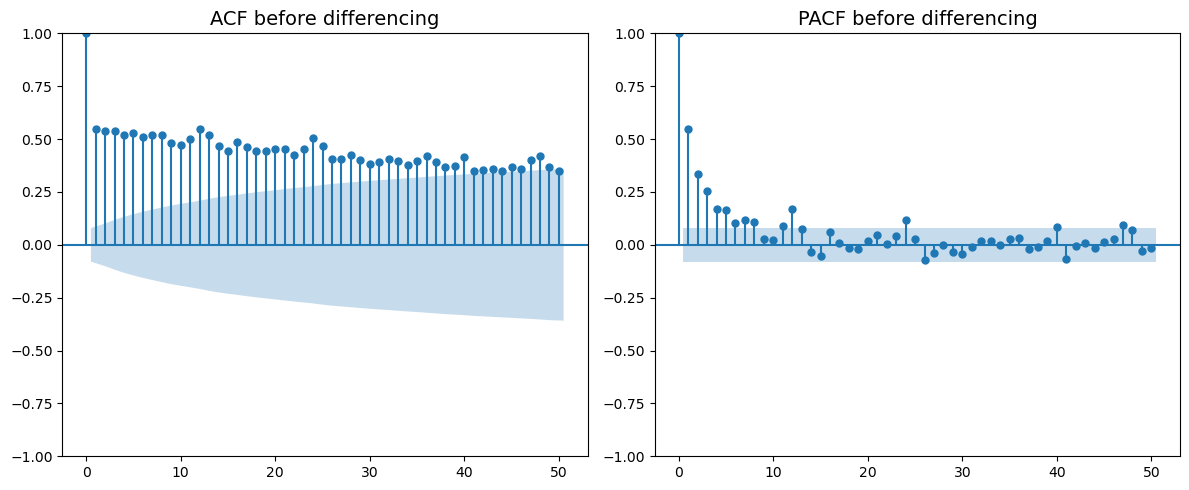

In [122]:
# Plot ACF of 'crashes' column on a Matplotlib figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two subplots

# Plot ACF on the first subplot
plot_acf(ts_df['crashes'], lags=50, ax=ax[0])
ax[0].set_title('ACF before differencing',fontsize=14)

# Plot PACF on the first subplot
plot_pacf(ts_df['crashes'], lags=50, ax=ax[1])
ax[1].set_title('PACF before differencing',fontsize=14)

plt.tight_layout()
plt.show()

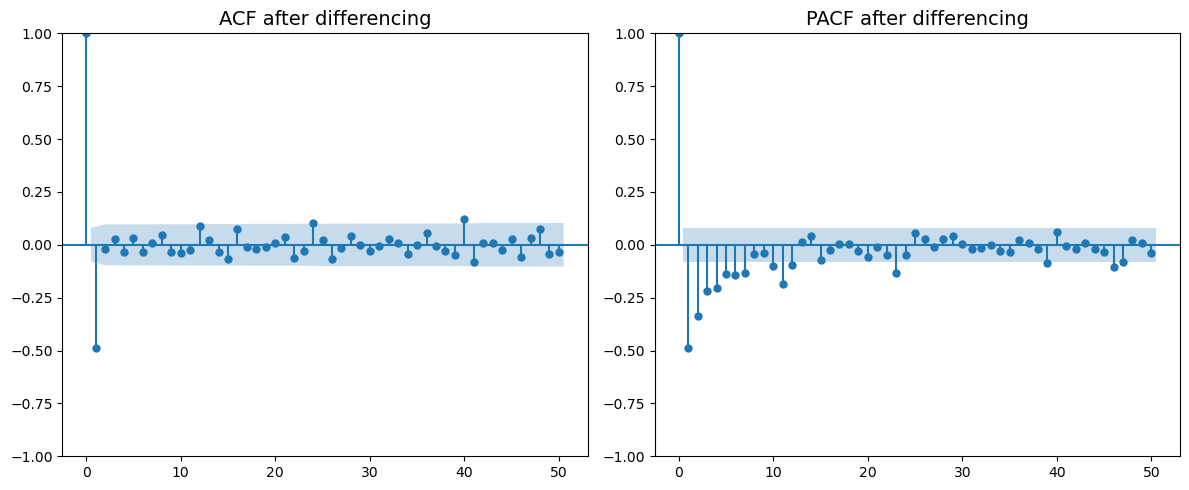

In [123]:
# Plot ACF of 'crashes' column on a Matplotlib figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two subplots

# Plot ACF on the first subplot
plot_acf(ts_df_diff['crashes'], lags=50, ax=ax[0])
ax[0].set_title('ACF after differencing',fontsize=14)

# Plot PACF on the second subplot
plot_pacf(ts_df_diff['crashes'], lags=50, ax=ax[1])
ax[1].set_title('PACF after differencing',fontsize=14)

plt.tight_layout()
plt.show()

> It's possible to see the change of the ACF and PACF after first order difference. There are a significant amount of  negative spikes at the beginning of PACF visualization that quickly decrease to zero line in the middle, while only one significante negative spike on the ACF. It means that Moving Average (MA1) should be used evaluated.

## Split the data into training and testing sets

In [124]:
ts_df.shape

(605, 1)

In [125]:
ts_df.head(2)

,crashes
date,
1972-01-31,18
1972-02-29,18


In [126]:
ts_df.tail(2)

,crashes
date,
2022-04-30,8
2022-05-31,9


In [127]:
# Divide into train and validation set to calculate mean absolute percentage error 
months = -24
train_data = ts_df[:months]
test_data  = ts_df[months:]

train_data.shape, test_data.shape

((581, 1), (24, 1))

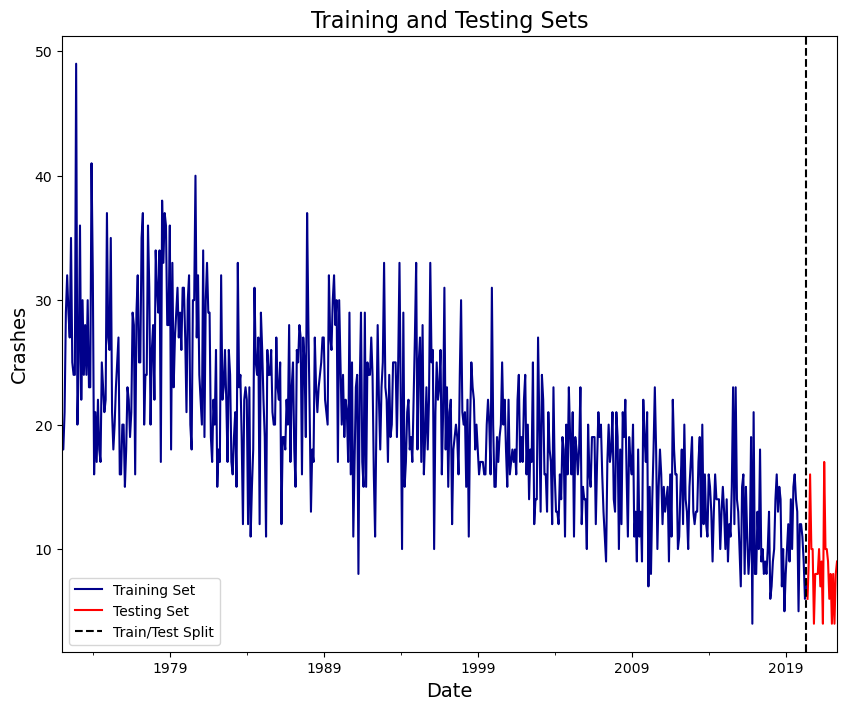

In [128]:
# Display training and testing sets

plt.figure(figsize=(10, 8))
train_data['crashes'].plot(label='Training Set', color='darkblue')
test_data['crashes'].plot(label='Testing Set', color='red')
plt.axvline(x=train_data.index[-1], color='black', linestyle='--', label='Train/Test Split')

# Title and labels
plt.title('Training and Testing Sets', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Crashes', fontsize=14)

# Show legend
plt.legend()

plt.show()


## Build the Time Series Models

# ARIMA MODEL

In [129]:
# Create a new dataframe to build the ARIMA model
arima_df = ts_df.copy()
arima_df.head()

,crashes
date,
1972-01-31,18
1972-02-29,18
1972-03-31,21
1972-04-30,29
1972-05-31,32


In [130]:
arima_df.shape

(605, 1)

In [131]:
arima_df = arima_df.iloc[5:]
arima_df.shape

(600, 1)

In [132]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'crashes' dataset
model = ARIMA(arima_df['crashes'], order = (1, 1, 1))

# Train ARIMA Model on the 'crashes' dataset
results_AR = model.fit()

In [133]:
from statsmodels.tsa.arima.model import ARIMA
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(arima_df['crashes'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 3991.0560371387855], [0, 1, 1, 3630.756029385572], [0, 1, 2, 3632.756025599224], [1, 1, 0, 3827.1705060428653], [1, 1, 1, 3632.7560257904543], [1, 1, 2, 3634.555980284951], [2, 1, 0, 3755.2867771940873], [2, 1, 1, 3634.656924624108], [2, 1, 2, 3636.3682882185385], [0, 2, 0, 4639.188404140734], [0, 2, 1, 3993.7818865069785], [0, 2, 2, 3635.3408800429897], [1, 2, 0, 4299.976659660082], [1, 2, 1, 3830.9394350607813], [1, 2, 2, 3637.3356777973863], [2, 2, 0, 4119.856853502755], [2, 2, 1, 3759.704564789776], [2, 2, 2, 3639.286705914381]]


In [134]:
smallest_last_value_list = min(aicVal, key=lambda x: x[-1])
smallest_last_value_list

[0, 1, 1, 3630.756029385572]

In [135]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(arima_df['crashes'].tolist(), order = (0, 1 , 1))

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1813.378
Date:                Mon, 30 Oct 2023   AIC                           3630.756
Time:                        18:44:00   BIC                           3639.547
Sample:                             0   HQIC                          3634.178
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9131      0.015    -60.244      0.000      -0.943      -0.883
sigma2        24.8741      1.333     18.667      0.000      22.262      27.486
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                13.04
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
# Declare the array 'pred' and append the values 
predictions = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into new dataframe
arima_df['ARIMA'] = predictions.astype(int)

# Residues and fitted values are added and stored into the new dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into the new dataframe
arima_df['diffval'] = diffval.astype(int)

# Display first five records
arima_df.head()

,crashes,ARIMA,diffval
date,,,
1972-06-30,29,0,29
1972-07-31,27,28,27
1972-08-31,35,27,35
1972-09-30,25,30,25
1972-10-31,24,28,24


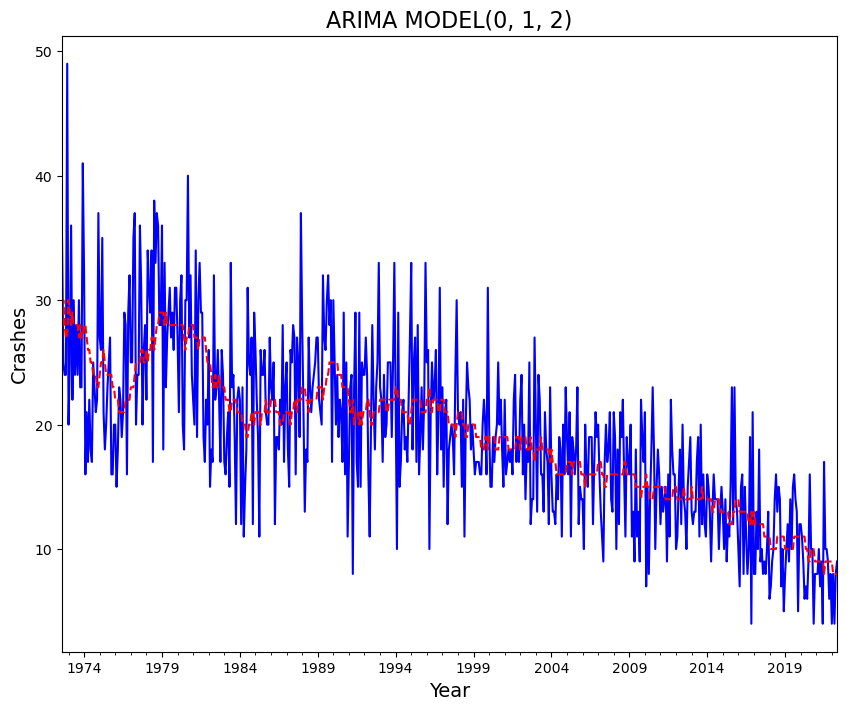

In [137]:
# Display ARIMA predictions Vs Residues and fitted values
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(10, 8)

# Ignore first two rows because of difference factor d = 2
arima_df['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
arima_df['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA MODEL(0, 1, 2)',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Crashes',fontsize=14);

## Interpreting the Prediction Interval

In [138]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 8.250 between 1.859 and 14.642
90.0% Confidence Interval: 8.250 between 0.047 and 16.454
95.0% Confidence Interval: 8.250 between -1.525 and 18.025
99.0% Confidence Interval: 8.250 between -4.596 and 21.097


## Model Evaluation

In [139]:
#We analyse MAE and RMSE   RMSEextreme values/outliers --- MAE try to explain the % is affecting the prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(arima_df['crashes'], arima_df['ARIMA']),0))

#we round the number, and I will include 0 because I don't want decimals in the result for the visualisation
print(round(np.sqrt(mean_squared_error(arima_df['crashes'], arima_df['ARIMA'])), 0))
#we round the number, and I will include 0 because I don't want decimals in the result for the visualisation

4.0
5.0


In [140]:
#MAPE function this is the error not the accurracy
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE(arima_df['crashes'], arima_df['ARIMA'])

23.40198021970517

# TBATS Time Series Model

In [141]:
# Create a new dataframe to build the TBATS model
tbats_df = ts_df.copy()
tbats_df.head()

,crashes
date,
1972-01-31,18
1972-02-29,18
1972-03-31,21
1972-04-30,29
1972-05-31,32


In [142]:
# Funtion to create new attributes based on index
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

# Call the function
tbats_df = create_features(tbats_df)
tbats_df 

,crashes,quarter,month,year
date,,,,
1972-01-31,18,1,1,1972
1972-02-29,18,1,2,1972
1972-03-31,21,1,3,1972
1972-04-30,29,2,4,1972
1972-05-31,32,2,5,1972
...,...,...,...,...
2022-01-31,4,1,1,2022
2022-02-28,8,1,2,2022
2022-03-31,4,1,3,2022


In [143]:
#Rename the dependent variable
tbats_df = tbats_df.rename(columns={'crashes': 'y'})
tbats_df

,y,quarter,month,year
date,,,,
1972-01-31,18,1,1,1972
1972-02-29,18,1,2,1972
1972-03-31,21,1,3,1972
1972-04-30,29,2,4,1972
1972-05-31,32,2,5,1972
...,...,...,...,...
2022-01-31,4,1,1,2022
2022-02-28,8,1,2,2022
2022-03-31,4,1,3,2022


In [144]:
# Shift index by desired number of periods with an optional time `freq`.
tbats_df['y_diff'] = tbats_df['y'] - tbats_df['y'].shift(1)
tbats_df.head()

,y,quarter,month,year,y_diff
date,,,,,
1972-01-31,18,1,1,1972,NaN
1972-02-29,18,1,2,1972,0.0
1972-03-31,21,1,3,1972,3.0
1972-04-30,29,2,4,1972,8.0
1972-05-31,32,2,5,1972,3.0


In [145]:
tbats_df.dropna(inplace=True)

In [146]:
tbats_df = tbats_df.iloc[5:]
tbats_df.shape

(599, 5)

In [147]:
# Divide into train and validation set to calculate mean absolute percentage error 
months = -24
train_data = tbats_df[:months]
test_data  = tbats_df[months:]

train_data.shape, test_data.shape

((575, 5), (24, 5))

In [148]:
# Build TBATS model
model = TBATS(use_trend = True, seasonal_periods = [12,365])
model = model.fit(train_data['y'])

#seasonal_periods: include the monthly pattern and yearly pattern

In [149]:
# Pperform predictions
predictions = model.forecast(steps = len(test_data))
predictions

array([10.96694716, 10.67862311, 10.97830105,  9.81263362,  8.8588755 ,
        8.63880158, 10.00152259,  8.47014688,  6.75609722,  7.4960041 ,
        6.37283711,  6.6102397 ,  7.23400178,  7.2170348 ,  7.68619649,
        6.97953363,  6.4363487 ,  6.49790435,  7.93721963,  6.87132831,
        5.59921457,  6.51481069,  5.71093026,  6.16065833])

In [150]:
# Perform predictions and use Pandas to give structure to the data
predictions = pd.Series(model.forecast(steps = len(test_data))).rename("TBATS")
predictions.index = test_data.index
predictions.head()

date
2020-06-30    10.966947
2020-07-31    10.678623
2020-08-31    10.978301
2020-09-30     9.812634
2020-10-31     8.858875
Freq: M, Name: TBATS, dtype: float64

In [151]:
test_data.head()

,y,quarter,month,year,y_diff
date,,,,,
2020-06-30,6,2,6,2020,-1.0
2020-07-31,9,3,7,2020,3.0
2020-08-31,16,3,8,2020,7.0
2020-09-30,10,3,9,2020,-6.0
2020-10-31,10,4,10,2020,0.0


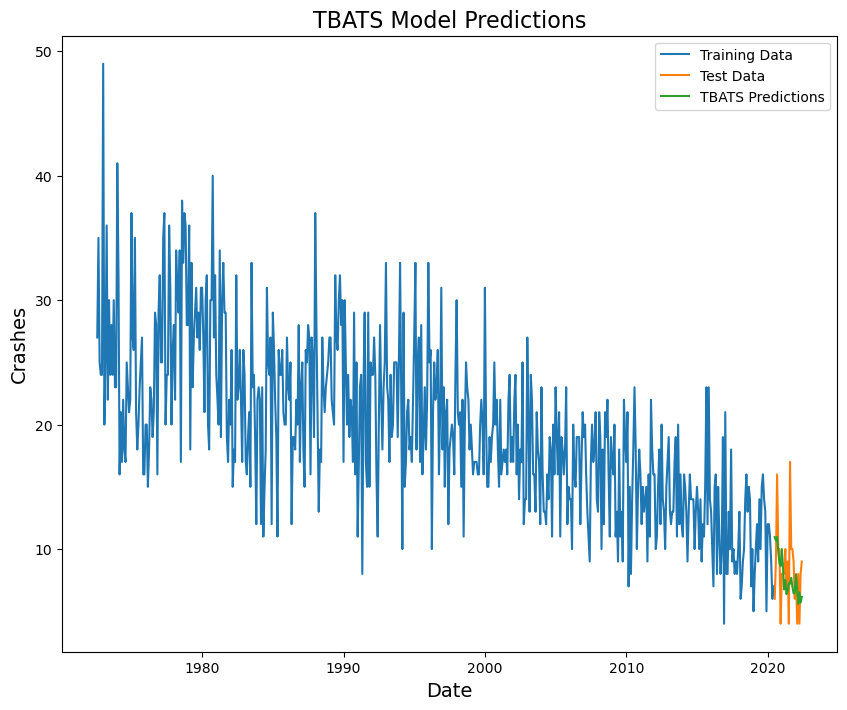

In [152]:
# Plot the training data, the test data and predictions
plt.figure(figsize=(10,8))
plt.plot(train_data.index, train_data['y'], label='Training Data')
plt.plot(test_data.index, test_data['y'], label='Test Data')
plt.plot(predictions.index, predictions, label='TBATS Predictions')

plt.title('TBATS Model Predictions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Crashes', fontsize=14)

# Show legend
plt.legend()
plt.show()

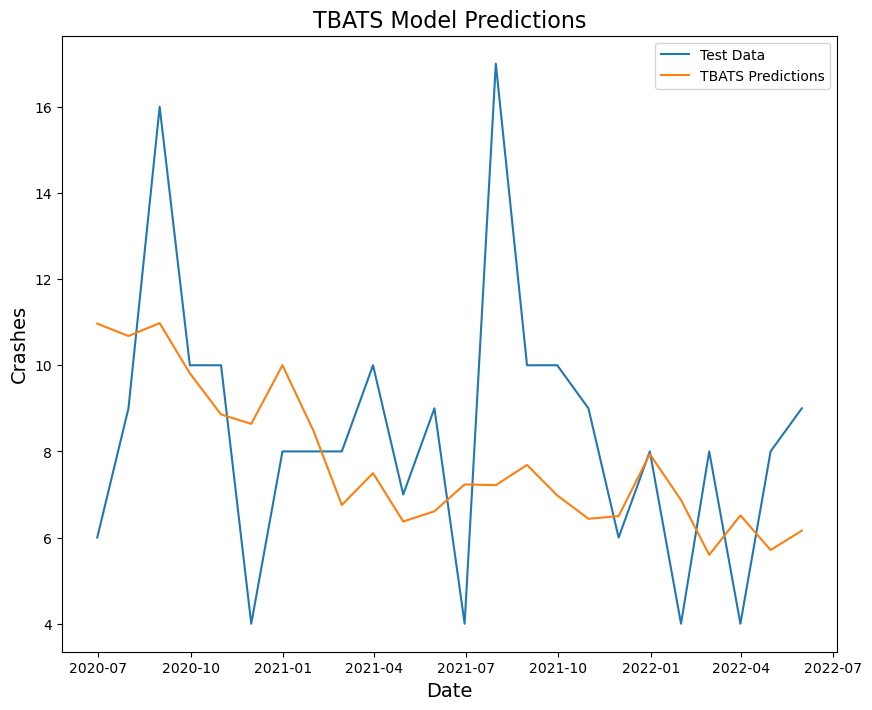

In [153]:

#Visualisation of our model Zoom on test_set
# Plot the training data, the test data and predictions
plt.figure(figsize=(10,8))
plt.plot(test_data.index, test_data['y'], label='Test Data')
plt.plot(predictions.index, predictions, label='TBATS Predictions')

plt.title('TBATS Model Predictions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Crashes', fontsize=14)

# Show legend
plt.legend()
plt.show()

## Model Evaluation

In [154]:
y_true= test_data['y']
y_pred= predictions

In [155]:
# Evaluate the model using MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(y_true, predictions),0))
print(round(np.sqrt(mean_squared_error(y_true, predictions)), 0))

3.0
3.0


In [156]:
# MAPE function to easy compreension of the model results
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(y_true, predictions)

34.30016829170354